In [1]:
import numpy as numpy
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
#!pip install pandas_datareader

In [3]:
import pandas_datareader
import datetime

In [4]:
import pandas_datareader.data as web

In [5]:
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2024, 1, 1)

In [6]:
tesla = web.DataReader('TSLA', 'stooq', start, end) # stooq

In [7]:
tesla.tail(5)

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-08,31.5800,33.2333,31.2153,32.8093,467990895
2020-01-07,30.7600,31.4420,30.2237,31.2707,273137070
2020-01-06,29.3647,30.1040,29.3333,30.1027,152362485
2020-01-03,29.3667,30.2667,29.1280,29.5340,266920455
2020-01-02,28.3000,28.7130,28.1140,28.6840,143375790


In [8]:
ford = web.DataReader('F', 'stooq', start, end)
gm = web.DataReader('GM', 'stooq', start, end)

In [9]:
ford.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-12-29,12.35,12.39,12.16,12.19,40964735.0
2023-12-28,12.38,12.43,12.28,12.34,26688508.0
2023-12-27,12.43,12.45,12.23,12.39,39891275.0
2023-12-26,12.39,12.50,12.37,12.45,26293667.0
2023-12-22,12.32,12.46,12.28,12.35,43764612.0


In [10]:
gm.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-12-29,36.13,36.460,35.860,35.92,14127707.0
2023-12-28,36.00,36.240,35.910,36.20,9719449.0
2023-12-27,36.10,36.260,35.700,36.08,11128541.0
2023-12-26,36.02,36.425,36.020,36.13,10733850.0
2023-12-22,36.11,36.620,35.835,36.02,15027614.0


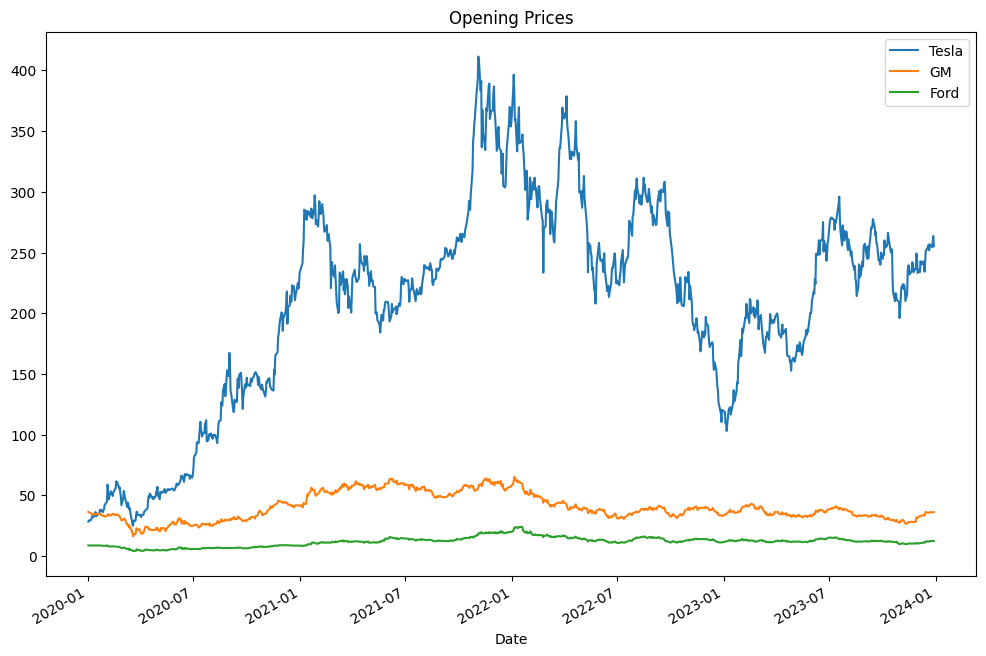

In [11]:
tesla['Open'].plot(label='Tesla', figsize=(12,8), title='Opening Prices')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend();

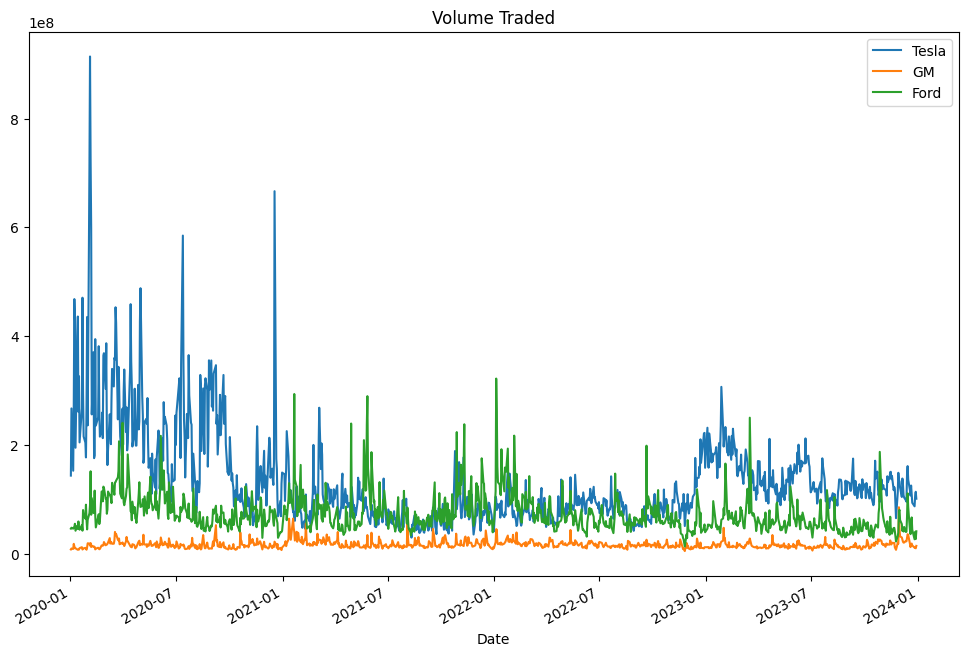

In [12]:
tesla['Volume'].plot(label='Tesla', figsize=(12,8), title='Volume Traded')
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')
plt.legend();

In [13]:
ford.index

DatetimeIndex(['2023-12-29', '2023-12-28', '2023-12-27', '2023-12-26',
               '2023-12-22', '2023-12-21', '2023-12-20', '2023-12-19',
               '2023-12-18', '2023-12-15',
               ...
               '2020-01-15', '2020-01-14', '2020-01-13', '2020-01-10',
               '2020-01-09', '2020-01-08', '2020-01-07', '2020-01-06',
               '2020-01-03', '2020-01-02'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [14]:
ford['Volume'].argmax()

499

In [15]:
ford.iloc[499]

Open      2.180920e+01
High      2.378270e+01
Low       2.171220e+01
Close     2.354260e+01
Volume    3.218056e+08
Name: 2022-01-04 00:00:00, dtype: float64

<Axes: xlabel='Date'>

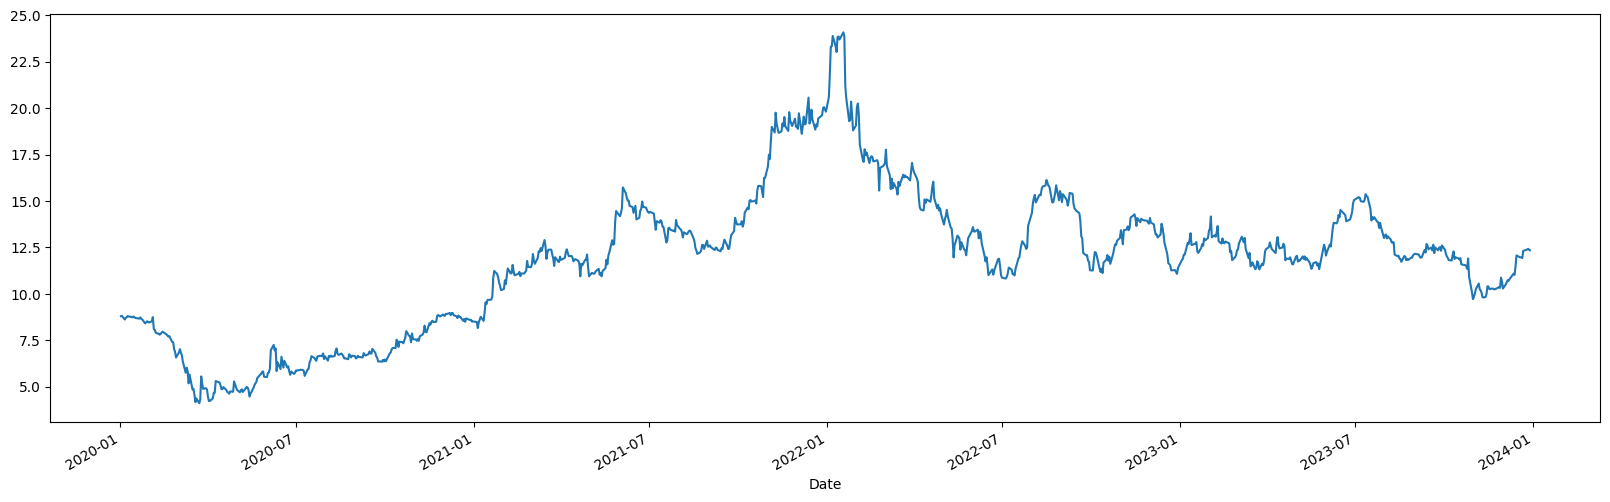

In [16]:
ford['Open'].plot(figsize=(20,6))

In [17]:
#tesla.head(10)
tesla["Total Traded"] = tesla["Open"] * tesla["Volume"]
ford["Total Traded"] = ford["Open"] * ford["Volume"]
gm["Total Traded"] = gm["Open"] * gm["Volume"]
#tesla.head(5)

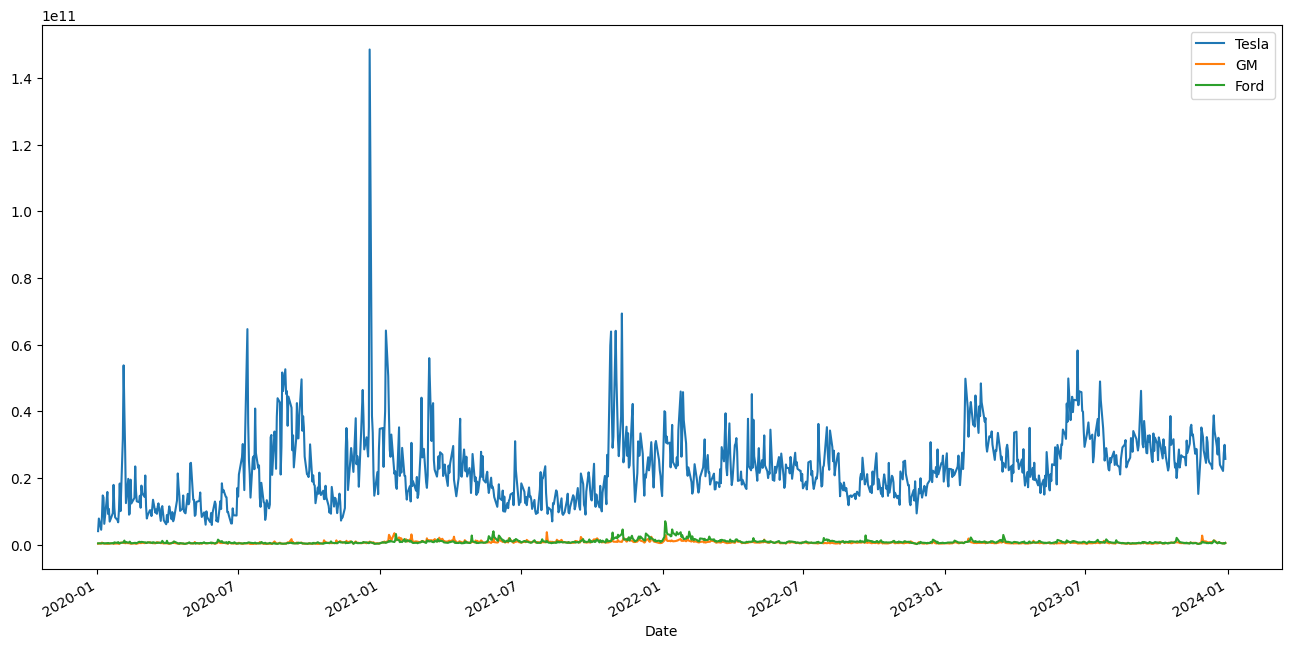

In [18]:
tesla['Total Traded'].plot(label='Tesla', figsize=(16,8))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend();

In [19]:
tesla['Total Traded'].argmax()

761

In [20]:
tesla.iloc[761]

Open            2.229670e+02
High            2.316670e+02
Low             2.095130e+02
Close           2.316670e+02
Volume          6.663786e+08
Total Traded    1.485804e+11
Name: 2020-12-18 00:00:00, dtype: float64

**Tesla shares closed around $232 on Dec. 18, 2020, the session before the company joined the S&P 500. Today they're about $258, a roughly 11% increase**

<Axes: xlabel='Date'>

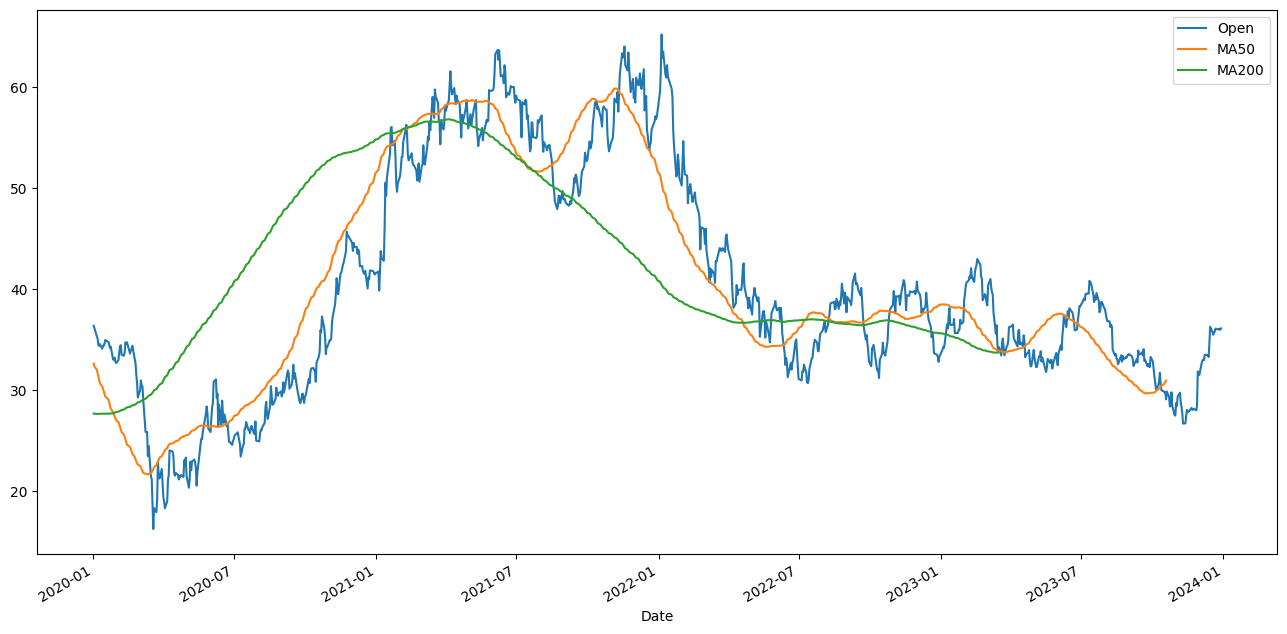

In [21]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open','MA50', 'MA200']].plot(figsize=(16,8))

In [22]:
#
from pandas.plotting import scatter_matrix

In [23]:
car_comp = pd.concat([tesla['Open'], gm['Open'], ford['Open']], axis=1)

In [24]:
car_comp.columns = ['Tesla Open', 'GM Open', 'Ford Open']

In [25]:
car_comp.head()

,Tesla Open,GM Open,Ford Open
Date,,,
2023-12-29,255.10,36.13,12.35
2023-12-28,263.66,36.00,12.38
2023-12-27,258.35,36.10,12.43
2023-12-26,254.49,36.02,12.39
2023-12-22,256.76,36.11,12.32


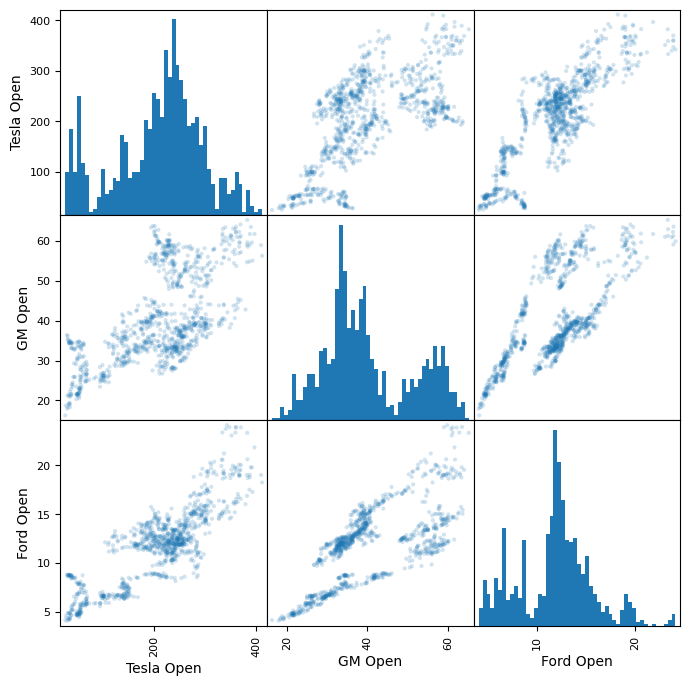

In [26]:
scatter_matrix(car_comp, figsize=(8,8),alpha=0.2, hist_kwds={'bins':50});

In [27]:
#
import mplfinance as mpf 
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

In [28]:
ford_reset = ford.loc['2021-01'].reset_index()

In [29]:
ford_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          19 non-null     datetime64[ns]
 1   Open          19 non-null     float64       
 2   High          19 non-null     float64       
 3   Low           19 non-null     float64       
 4   Close         19 non-null     float64       
 5   Volume        19 non-null     float64       
 6   Total Traded  19 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.2 KB


In [30]:
ford_reset.head()

,Date,Open,High,Low,Close,Volume,Total Traded
0,2021-01-29,10.2045,10.4407,10.0702,10.1457,7.672035e+07,7.828928e+08
1,2021-01-28,10.4455,10.6484,10.3191,10.3289,8.031409e+07,8.389208e+08
2,2021-01-27,10.6190,10.7630,10.3103,10.3965,8.599541e+07,9.131852e+08
3,2021-01-26,10.8973,11.1099,10.7140,10.7826,6.877249e+07,7.494344e+08
4,2021-01-25,11.0717,11.1001,10.4837,10.8787,1.234512e+08,1.366815e+09


In [31]:
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))

In [32]:
ford_reset.head()

,Date,Open,High,Low,Close,Volume,Total Traded,date_ax
0,2021-01-29,10.2045,10.4407,10.0702,10.1457,7.672035e+07,7.828928e+08,18656.0
1,2021-01-28,10.4455,10.6484,10.3191,10.3289,8.031409e+07,8.389208e+08,18655.0
2,2021-01-27,10.6190,10.7630,10.3103,10.3965,8.599541e+07,9.131852e+08,18654.0
3,2021-01-26,10.8973,11.1099,10.7140,10.7826,6.877249e+07,7.494344e+08,18653.0
4,2021-01-25,11.0717,11.1001,10.4837,10.8787,1.234512e+08,1.366815e+09,18652.0


In [33]:
list_of_cols = ['date_ax', 'Open', 'High', 'Low', 'Close']
ford_values = [tuple(vals) for vals in ford_reset[list_of_cols].values ]

In [34]:
ford_values[0]

(18656.0, 10.2045, 10.4407, 10.0702, 10.1457)

In [35]:
mondays = WeekdayLocator(MONDAY) # major ticks on the mondays
alldays = DayLocator() # minor ticks on the days
weekFormatter = DateFormatter('%b %d') # e.g., Jan 12
dayFormatter = DateFormatter('%d') # e.g., 12

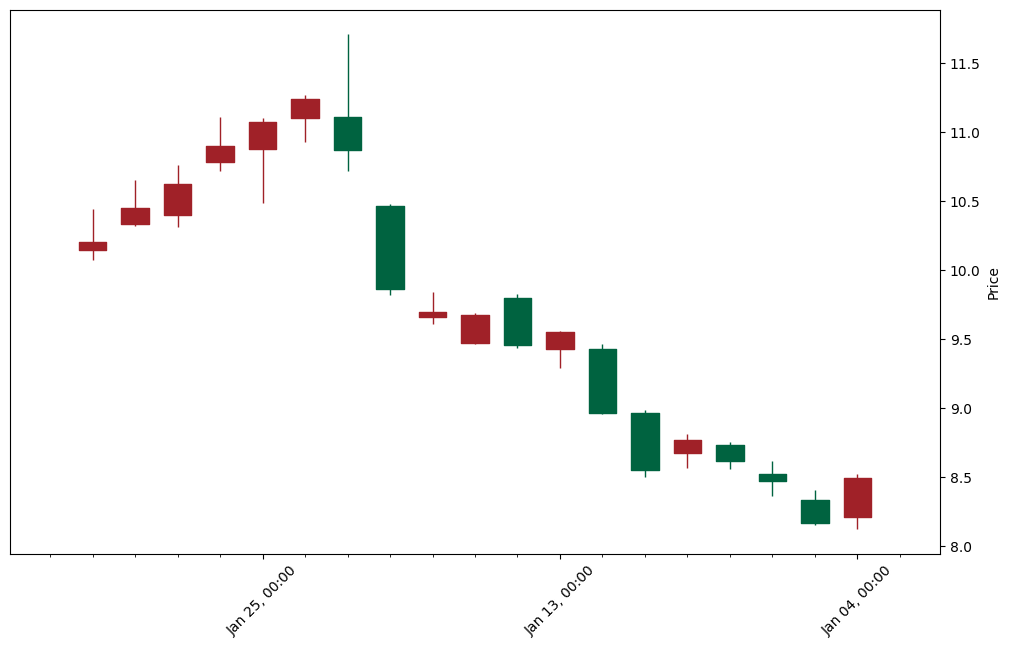

In [68]:
fig, ax = plt.subplots(figsize=(12,8))
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

mpf.plot(ford_reset_test, type='candle', ax=ax, style='charles')
plt.show()

In [38]:
type(ford_values)

list

In [39]:
#ford_values_df = pd.DataFrame(ford_values, columns=['date_ax','','','','']
ford_reset_test = ford_reset.copy()
ford_reset_test.head()

,Date,Open,High,Low,Close,Volume,Total Traded,date_ax
0,2021-01-29,10.2045,10.4407,10.0702,10.1457,7.672035e+07,7.828928e+08,18656.0
1,2021-01-28,10.4455,10.6484,10.3191,10.3289,8.031409e+07,8.389208e+08,18655.0
2,2021-01-27,10.6190,10.7630,10.3103,10.3965,8.599541e+07,9.131852e+08,18654.0
3,2021-01-26,10.8973,11.1099,10.7140,10.7826,6.877249e+07,7.494344e+08,18653.0
4,2021-01-25,11.0717,11.1001,10.4837,10.8787,1.234512e+08,1.366815e+09,18652.0


In [40]:
ford_reset_test.drop('date_ax',axis=1, inplace=True)

In [41]:
ford_reset_test.head()

,Date,Open,High,Low,Close,Volume,Total Traded
0,2021-01-29,10.2045,10.4407,10.0702,10.1457,7.672035e+07,7.828928e+08
1,2021-01-28,10.4455,10.6484,10.3191,10.3289,8.031409e+07,8.389208e+08
2,2021-01-27,10.6190,10.7630,10.3103,10.3965,8.599541e+07,9.131852e+08
3,2021-01-26,10.8973,11.1099,10.7140,10.7826,6.877249e+07,7.494344e+08
4,2021-01-25,11.0717,11.1001,10.4837,10.8787,1.234512e+08,1.366815e+09


In [42]:
ford_reset.head()

,Date,Open,High,Low,Close,Volume,Total Traded,date_ax
0,2021-01-29,10.2045,10.4407,10.0702,10.1457,7.672035e+07,7.828928e+08,18656.0
1,2021-01-28,10.4455,10.6484,10.3191,10.3289,8.031409e+07,8.389208e+08,18655.0
2,2021-01-27,10.6190,10.7630,10.3103,10.3965,8.599541e+07,9.131852e+08,18654.0
3,2021-01-26,10.8973,11.1099,10.7140,10.7826,6.877249e+07,7.494344e+08,18653.0
4,2021-01-25,11.0717,11.1001,10.4837,10.8787,1.234512e+08,1.366815e+09,18652.0


In [43]:
ford_reset_test.set_index('Date')

,Open,High,Low,Close,Volume,Total Traded
Date,,,,,,
2021-01-29,10.20450,10.44070,10.07020,10.14570,7.672035e+07,7.828928e+08
2021-01-28,10.44550,10.64840,10.31910,10.32890,8.031409e+07,8.389208e+08
2021-01-27,10.61900,10.76300,10.31030,10.39650,8.599541e+07,9.131852e+08
2021-01-26,10.89730,11.10990,10.71400,10.78260,6.877249e+07,7.494344e+08
2021-01-25,11.07170,11.10010,10.48370,10.87870,1.234512e+08,1.366815e+09
2021-01-22,11.23630,11.26470,10.92670,11.10010,1.358136e+08,1.526043e+09
2021-01-21,10.86890,11.70760,10.71400,11.10990,2.934505e+08,3.189484e+09
2021-01-20,9.85762,10.47490,9.81842,10.46510,1.297597e+08,1.279121e+09
2021-01-19,9.69398,9.83802,9.60677,9.65478,8.170900e+07,7.920854e+08


In [44]:
ford_reset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          19 non-null     datetime64[ns]
 1   Open          19 non-null     float64       
 2   High          19 non-null     float64       
 3   Low           19 non-null     float64       
 4   Close         19 non-null     float64       
 5   Volume        19 non-null     float64       
 6   Total Traded  19 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.2 KB


In [45]:
ford_reset_test['Date'] = pd.to_datetime(ford_reset_test['Date']) # Ensure 'Date' column is in datetime format
ford_reset_test.set_index('Date', inplace=True) # Set 'Date' as the index

In [46]:
ford_reset_test.index

DatetimeIndex(['2021-01-29', '2021-01-28', '2021-01-27', '2021-01-26',
               '2021-01-25', '2021-01-22', '2021-01-21', '2021-01-20',
               '2021-01-19', '2021-01-15', '2021-01-14', '2021-01-13',
               '2021-01-12', '2021-01-11', '2021-01-08', '2021-01-07',
               '2021-01-06', '2021-01-05', '2021-01-04'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [47]:
# return column from close price
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1) )  - 1
tesla['returns']

Date
2023-12-29         NaN
2023-12-28    0.018915
2023-12-27    0.032625
2023-12-26   -0.018475
2023-12-22   -0.015861
                ...   
2020-01-08    0.022437
2020-01-07   -0.046895
2020-01-06   -0.037351
2020-01-03   -0.018892
2020-01-02   -0.028780
Name: returns, Length: 1006, dtype: float64

In [48]:
tesla['Close'].head()

Date
2023-12-29    248.48
2023-12-28    253.18
2023-12-27    261.44
2023-12-26    256.61
2023-12-22    252.54
Name: Close, dtype: float64

In [49]:
tesla['Close'].shift(1).head()

Date
2023-12-29       NaN
2023-12-28    248.48
2023-12-27    253.18
2023-12-26    261.44
2023-12-22    256.61
Name: Close, dtype: float64

**(rt / rt-1) - 1**

In [50]:
tesla['returns'] = tesla['Close'].pct_change(1)

In [51]:
tesla['returns']

Date
2023-12-29         NaN
2023-12-28    0.018915
2023-12-27    0.032625
2023-12-26   -0.018475
2023-12-22   -0.015861
                ...   
2020-01-08    0.022437
2020-01-07   -0.046895
2020-01-06   -0.037351
2020-01-03   -0.018892
2020-01-02   -0.028780
Name: returns, Length: 1006, dtype: float64

In [52]:
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

In [53]:
ford.head()

,Open,High,Low,Close,Volume,Total Traded,returns
Date,,,,,,,
2023-12-29,12.35,12.39,12.16,12.19,40964735.0,5.059145e+08,NaN
2023-12-28,12.38,12.43,12.28,12.34,26688508.0,3.304037e+08,0.012305
2023-12-27,12.43,12.45,12.23,12.39,39891275.0,4.958485e+08,0.004052
2023-12-26,12.39,12.50,12.37,12.45,26293667.0,3.257785e+08,0.004843
2023-12-22,12.32,12.46,12.28,12.35,43764612.0,5.391800e+08,-0.008032


<Axes: >

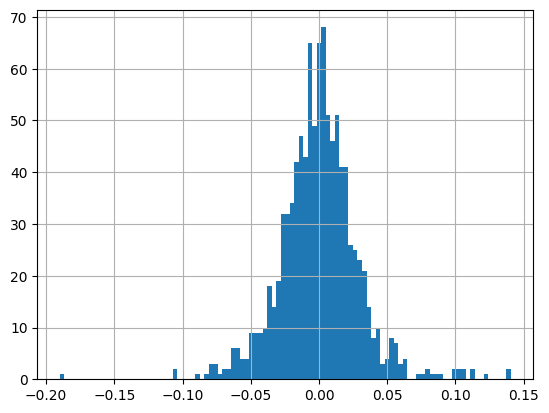

In [54]:
# which stock is most volatile
ford['returns'].hist(bins=100)

<Axes: >

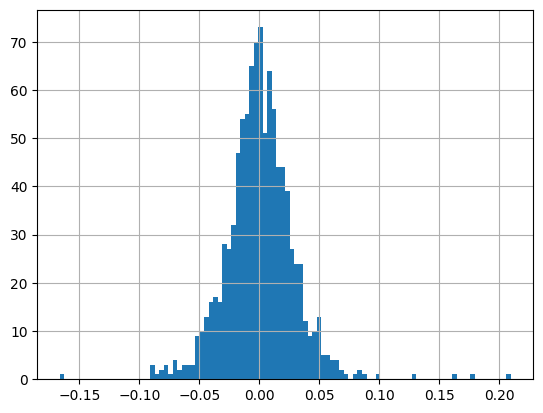

In [55]:
gm['returns'].hist(bins=100)

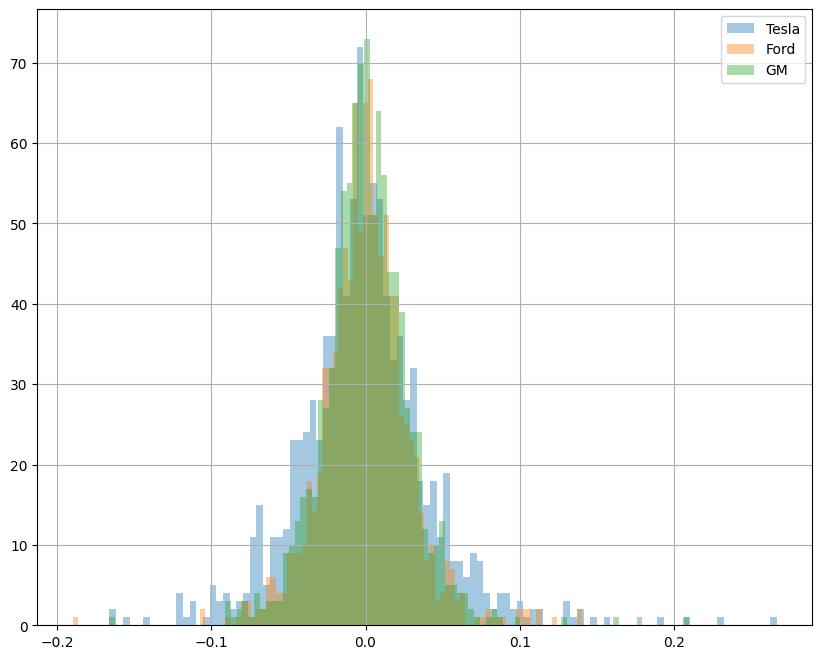

In [56]:
tesla['returns'].hist(bins=100, label='Tesla', figsize=(10,8), alpha=0.4)
ford['returns'].hist(bins=100, label='Ford', figsize=(10,8), alpha=0.4)
gm['returns'].hist(bins=100, label='GM', figsize=(10,8), alpha=0.4)
plt.legend()

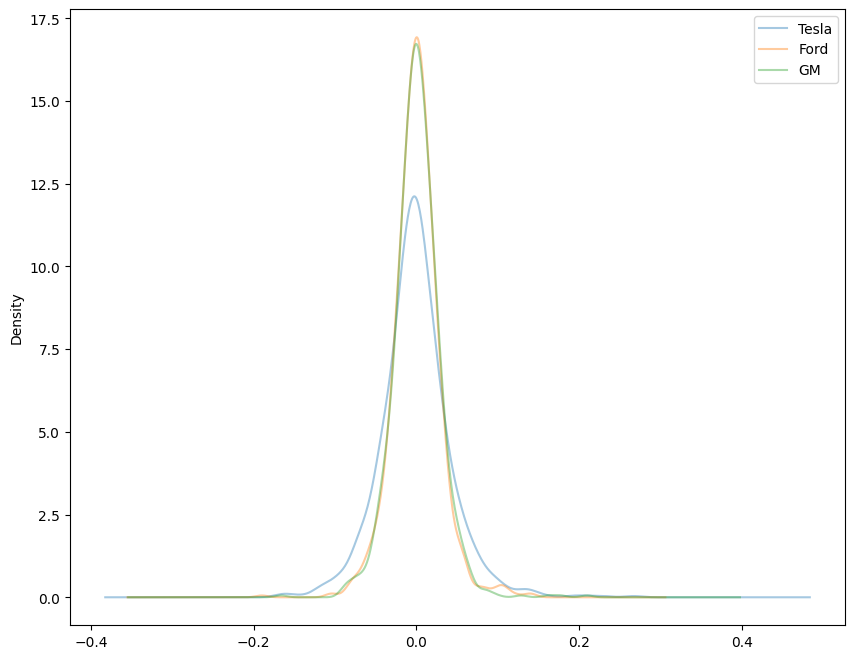

In [57]:
tesla['returns'].plot(kind='kde', label='Tesla', figsize=(10,8), alpha=0.4)
ford['returns'].plot(kind='kde', label='Ford', figsize=(10,8), alpha=0.4)
gm['returns'].plot(kind='kde', label='GM', figsize=(10,8), alpha=0.4)
plt.legend()

**Ford is more stable**

<Axes: >

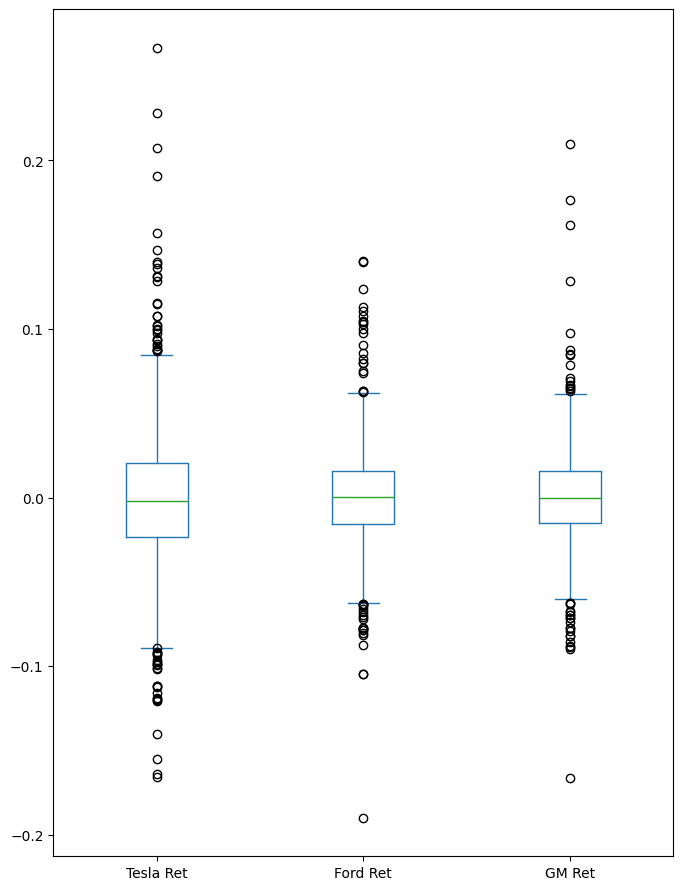

In [58]:
box_df = pd.concat([tesla['returns'], ford['returns'], gm['returns']], axis=1)
box_df.columns = ['Tesla Ret', 'Ford Ret', 'GM Ret']
box_df.plot(kind='box', figsize=(8, 11))

**Ford stock is more stable**

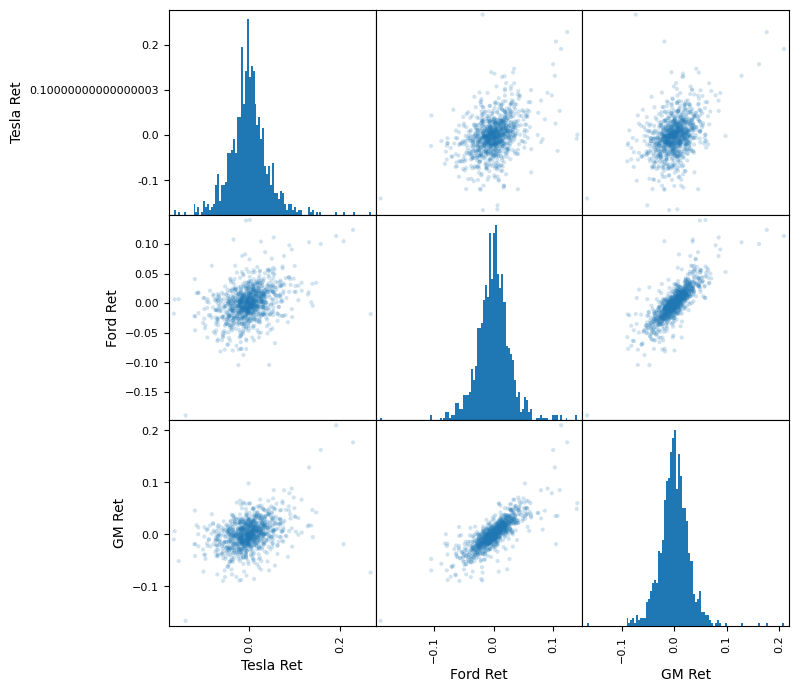

In [59]:
# Comparing daily returns between stocks1.ipynb
scatter_matrix(box_df, figsize=(8,8), alpha=0.2, hist_kwds={'bins':100});

<Axes: xlabel='Ford Ret', ylabel='GM Ret'>

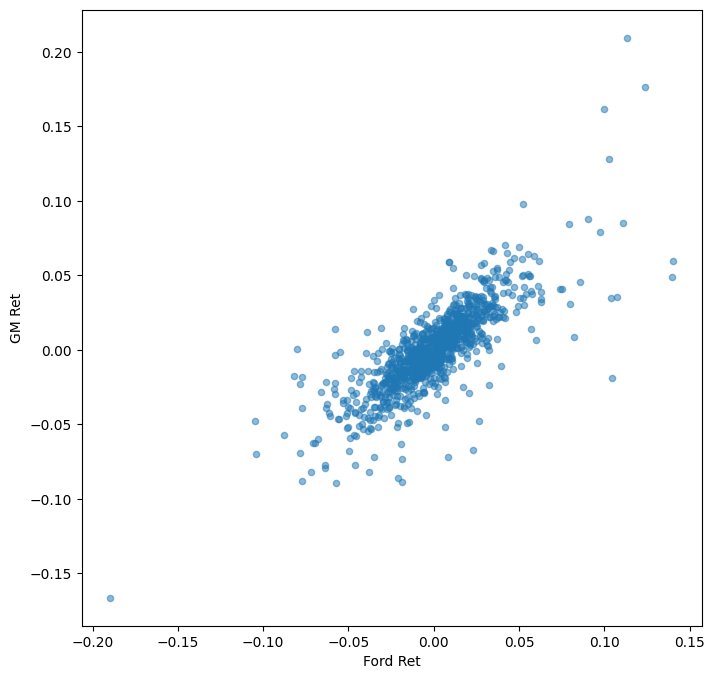

In [60]:
box_df.plot(kind='scatter', x='Ford Ret', y='GM Ret', alpha=0.5, figsize=(8,8))

In [64]:
import numpy as np
box_df.head()

,Tesla Ret,Ford Ret,GM Ret
Date,,,
2023-12-29,NaN,NaN,NaN
2023-12-28,0.018915,0.012305,0.007795
2023-12-27,0.032625,0.004052,-0.003315
2023-12-26,-0.018475,0.004843,0.001386
2023-12-22,-0.015861,-0.008032,-0.003045


In [65]:
x = box_df['Ford Ret'][1:]
y = box_df['GM Ret'][1:]
m, b = np.polyfit(x, y, 1) # m is slope , b is intercept

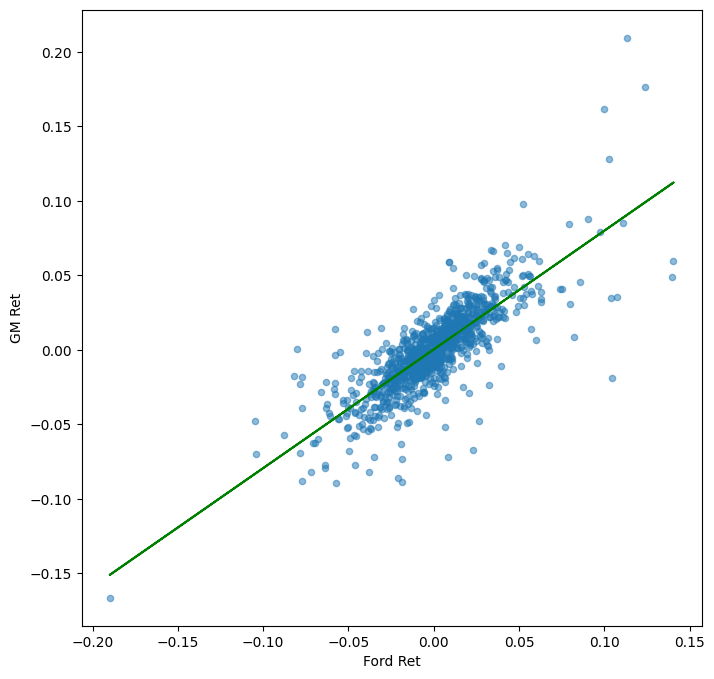

In [67]:
box_df.plot(kind='scatter', x='Ford Ret', y='GM Ret', alpha=0.5, figsize=(8,8))
# Add the regression line to the plot 
plt.plot(x, m*x+b, color='green')
# Show the plot 
plt.show()

In [69]:
# Cumulative daily return 
# A cumulative returns the aggregate amount an investment has gained or lost over time, independent of the period of time involved.
# This is different than just the stock price at the current day, because it will take into account the daily return. 
# The calculations here wont take into account stocks that give back a divident
# Daily returns is the profit/loss made by the stock compared to the previous day 
# A value above 1 indicates profit, similarly a value below one indicates loss 
# We express it as percentage, if the value is above 0, the stock has given you profit otherwise it is a loss

# Date            Daily Return                  % Daily Return
# 2018-01-01         10/10 = 1                          -
# 2018-01-02         15/10 = 3/2                       50%
# 2018-01-03         20/15 = 4/3                       33%





In [ ]:
# Cumulative Return:
# While daily returns are useful, it does not give the investor an immediate insight into gains he or she has made till date, especially if the
# stock is very volatile 
# Cumulative return is computed relative to the day investment is made. 
# if cumulative return is above one, you are making profits else you are in loss.

# Date            Daily Return                  % Daily Return
# 2018-01-01         10/10 = 1                         100%
# 2018-01-02         15/10 = 3/2                       150%
# 2018-01-03         20/10 = 2                         200%

# The formula for a cumulative daily return is: Ii = (1 + Rt) * It-1
# Here we can see we are just multiplying our previous investment at i at t-1 by 1+ our percent return
# We can do this with pandas cumprod() method 




